SNR=30dB


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 1/1 [00:05<00:00,  5.15s/it]


SNR=30dB


100%|██████████| 1/1 [00:10<00:00, 10.03s/it]


SNR=15dB


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


SNR=15dB


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


SNR=15dB


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


SNR=15dB


100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

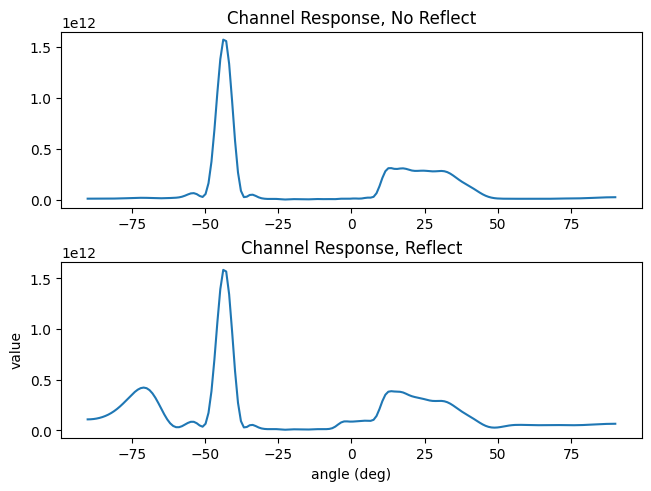

SNR=15dB


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


SNR=15dB


100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


SNR=15dB


100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


SNR=15dB


100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


SNR=15dB


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


SNR=15dB


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


SNR=15dB


100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


SNR=15dB


100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


SNR=15dB


100%|██████████| 5/5 [00:02<00:00,  2.38it/s]


SNR=15dB


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


<Figure size 640x480 with 0 Axes>

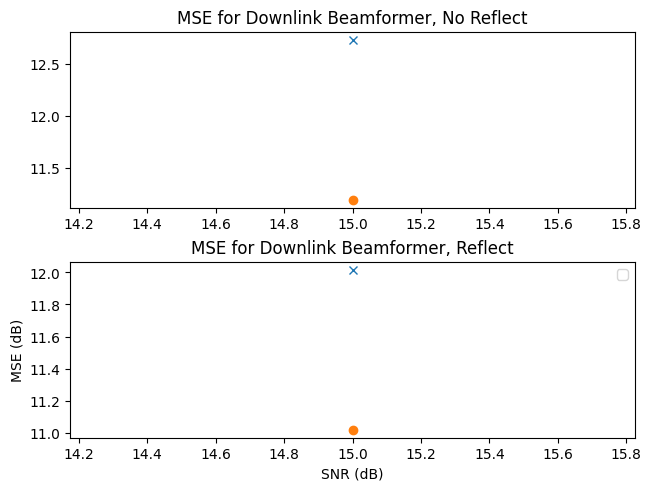

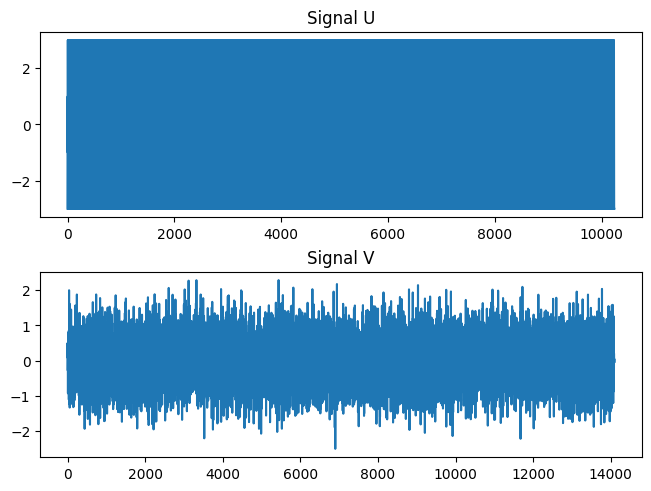

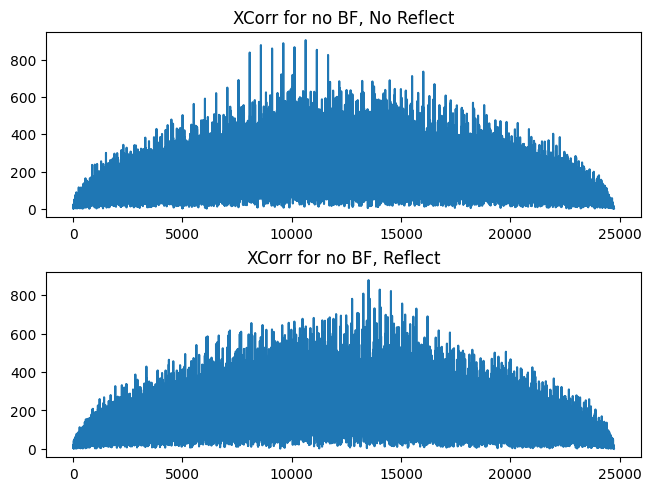

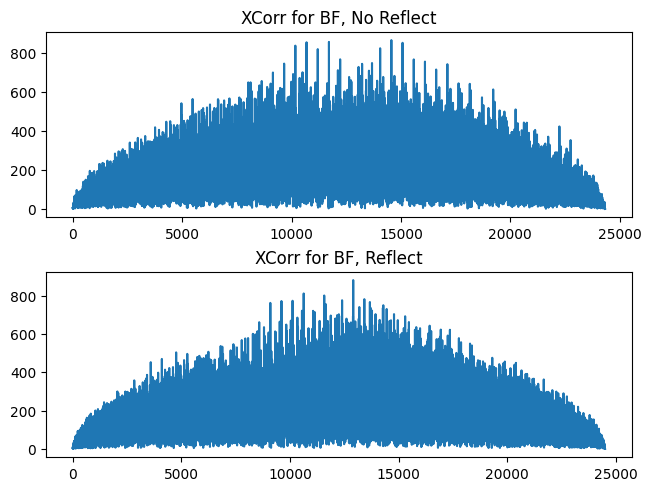

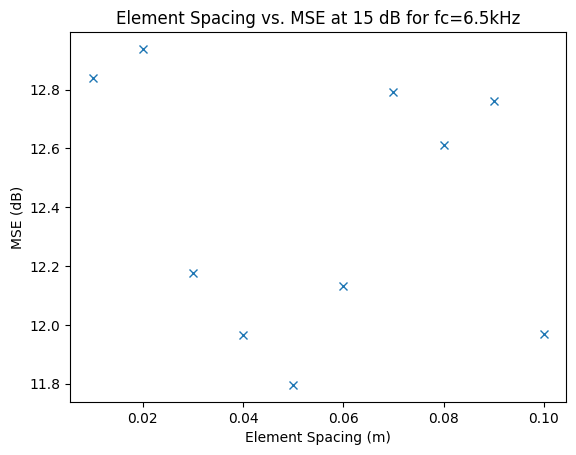

'\nfig,ax = plt.subplots()\nax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c=\'r\', marker=\'x\')\nax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c=\'g\', marker=\'x\')\nax.scatter(np.real(true_sym), np.imag(true_sym), c=\'b\',marker=\'o\')\nax.legend([\'RX DL, no BF\', \'RX DL, BF\',\'16QAM Constellation Points\'])\nax.set_ylim(-4, 4)\nax.set_xlim(-4,4)\nax.set_title("Constellation Diagram for SNR=15dB")\nplt.show()\n'

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from downlink import downlink

fc = 6.5e3
# Design with one tx (AWGN LOS), then with tx + reflect
My_bf_1 = bf_multichannel_const(6.5e3, 1, 1, 1)
My_bf_1.reflection_list = np.array([1])
My_bf_1.x_tx_list = np.array([5])
My_bf_1.y_tx_list = np.array([5])

My_bf_2 = bf_multichannel_const(6.5e3, 2, 1, 1) #still unclear on that second variable
My_bf_2.reflection_list = np.array([1,0.5])
My_bf_2.x_tx_list = np.array([5,15])
My_bf_2.y_tx_list = np.array([5,5])

theta_bf_1, wk_1, S_theta_1 = My_bf_1.simulation()
theta_bf_2, wk_2, S_theta_2 = My_bf_2.simulation()

# run this 4 times -> no bf, no reflect; no bf, reflect; bf, no reflect; bf, reflect;
My_ue_nobf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False)
My_ue_nobf_1.reflection_list = np.array([1])
My_ue_nobf_1.x_rx_list = np.array([5])
My_ue_nobf_1.y_rx_list = np.array([5])
My_ue_nobf_1.simulation()
mse_no_bf_1 = My_ue_nobf_1.mean_mse
symbolset_no_bf_1 = My_ue_nobf_1.mean_symbols[-1,:]
v_no_bf_1 = My_ue_nobf_1.mean_v

My_ue_nobf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=False) #should you change the 2nd variable?
My_ue_nobf_2.reflection_list = np.array([1,0.5])
My_ue_nobf_2.x_rx_list = np.array([5,15])
My_ue_nobf_2.y_rx_list = np.array([5,5])
My_ue_nobf_2.simulation()
mse_no_bf_2 = My_ue_nobf_2.mean_mse
symbolset_no_bf_2 = My_ue_nobf_2.mean_symbols[-1,:]
v_no_bf_2 = My_ue_nobf_2.mean_v

My_ue_bf_1 = downlink(6.5e3, 1, 1, theta=theta_bf_1, wk=wk_1, apply_bf=True)
My_ue_bf_1.reflection_list = np.array([1])
My_ue_bf_1.x_rx_list = np.array([5])
My_ue_bf_1.y_rx_list = np.array([5])
My_ue_bf_1.simulation()
mse_bf_1 = My_ue_bf_1.mean_mse
symbolset_bf_1 = My_ue_bf_1.mean_symbols[-1,:]
v_bf_1 = My_ue_bf_1.mean_v

My_ue_bf_2 = downlink(6.5e3, 1, 1, theta=theta_bf_2, wk=wk_2, apply_bf=True)
My_ue_bf_2.reflection_list = np.array([1,0.5])
My_ue_bf_2.x_rx_list = np.array([5,15])
My_ue_bf_2.y_rx_list = np.array([5,5])
My_ue_bf_2.simulation()
mse_bf_2 = My_ue_bf_2.mean_mse
symbolset_bf_2 = My_ue_bf_2.mean_symbols[-1,:]
v_bf_2 = My_ue_bf_2.mean_v

# equalizer taps
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))
d = My_ue_bf_1.preambles
#u_1 = d * np.exp(-2 * np.pi * 1j * My_ue_bf_1.fc * np.arange(len(d))/My_ue_bf_1.Fs)
#u_1 = signal.resample_poly(u_1,My_ue_bf_1.nsps,1)
# rescale v or u_1
#u_1 = u_1 - np.mean(u_1)
#u_1 = signal.decimate(u_1,My_ue_bf_1.df)
#u_1 = signal.resample_poly(u_1[::-1].conj(), My_ue_bf_1.nsps, 1)
u_1 = d[::-1].conj()

d = My_ue_bf_2.preambles
#u_2 = d * np.exp(-2 * np.pi * 1j * My_ue_bf_2.fc * np.arange(len(d))/My_ue_bf_2.Fs)
#u_2 = signal.resample(u_2,len(v_bf_2))
#u_2 = u_2 - np.mean(u_2)
#u_2 = signal.decimate(u_2,My_ue_bf_2.df)
#u_2 = signal.resample_poly(u_2[::-1].conj(), My_ue_bf_2.nsps, 1)
u_2 = d[::-1].conj()

# S_theta Plots
plt.figure(1)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(np.linspace(-90,90,len(S_theta_1)), S_theta_1)
plt.xlabel('angle (deg)')
plt.ylabel('value')
ax1.set_title('Channel Response, No Reflect')
ax2.plot(np.linspace(-90,90,len(S_theta_2)), S_theta_2)
ax2.set_title('Channel Response, Reflect')
plt.show()

# D0 plots -> later

# SNR/MSE Plots
plt.figure(2)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(My_ue_nobf_1.snr_list, mse_no_bf_1, 'x')
ax1.plot(My_ue_bf_1.snr_list, mse_bf_1, 'o')
plt.legend (['No BF', 'BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
ax1.set_title('MSE for Downlink Beamformer, No Reflect')
ax2.plot(My_ue_nobf_2.snr_list, mse_no_bf_2, 'x')
ax2.plot(My_ue_bf_2.snr_list, mse_bf_2, 'o')
ax2.set_title('MSE for Downlink Beamformer, Reflect')
plt.show


# xcorr graphs
# rate-matched received signals (v)
Ns = My_ue_bf_1.Ns
df = My_ue_bf_1.df
v_no_bf_1 = signal.decimate(v_no_bf_1,Ns)
v_no_bf_2 = signal.decimate(v_no_bf_2,Ns)
v_bf_1 = signal.decimate(v_bf_1,Ns)
v_bf_2 = signal.decimate(v_bf_2,Ns)

plt.figure(3)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
ax1.plot(u_1)
ax2.plot(v_bf_1)
ax1.set_title('Signal U')
ax2.set_title('Signal V')

plt.figure(4)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
xcor = np.abs(signal.fftconvolve(v_no_bf_1,u_1))
ax1.plot(xcor) #[0:2000])
xcor = np.abs(signal.fftconvolve(v_no_bf_2,u_2))
ax2.plot(xcor) #[0:2000])
ax1.set_title('XCorr for no BF, No Reflect')
ax2.set_title('XCorr for no BF, Reflect')

plt.figure(5)
f, (ax1,ax2) = plt.subplots(2,1,layout='constrained')
xcor = np.abs(signal.fftconvolve(v_bf_1,u_1))
ax1.plot(xcor) #[0:2000])
xcor = np.abs(signal.fftconvolve(v_bf_2,u_2))
ax2.plot(xcor) #[0:2000])
ax1.set_title('XCorr for BF, No Reflect')
ax2.set_title('XCorr for BF, Reflect')

# plot element spacing for downlink and MSE for 10 dB
d = 0.01*(1+np.arange(10))
mse_bf_d = np.zeros_like(d)
for i in range(10):
    d0 = d[i]
    My_ue_bf_d = downlink(6.5e3, 1, 5, theta=theta_bf_2, wk=wk_2, apply_bf=True)
    My_ue_bf_d.d0 = d0
    My_ue_bf_d.reflection_list = np.array([1])
    My_ue_bf_d.x_rx_list = np.array([5])
    My_ue_bf_d.y_rx_list = np.array([5])
    My_ue_bf_d.simulation()
    mse_bf_d[i] = My_ue_bf_d.mean_mse


plt.figure()
plt.plot(d, mse_bf_d, 'x')
#plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.xlabel('Element Spacing (m)')
plt.ylabel('MSE (dB)')
plt.title(f'Element Spacing vs. MSE at 15 dB for fc={fc/1000:.1f}kHz')
plt.show()

"""
fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""